In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
sns.set()

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Identifying Null values

In [9]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Data Visualisations

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

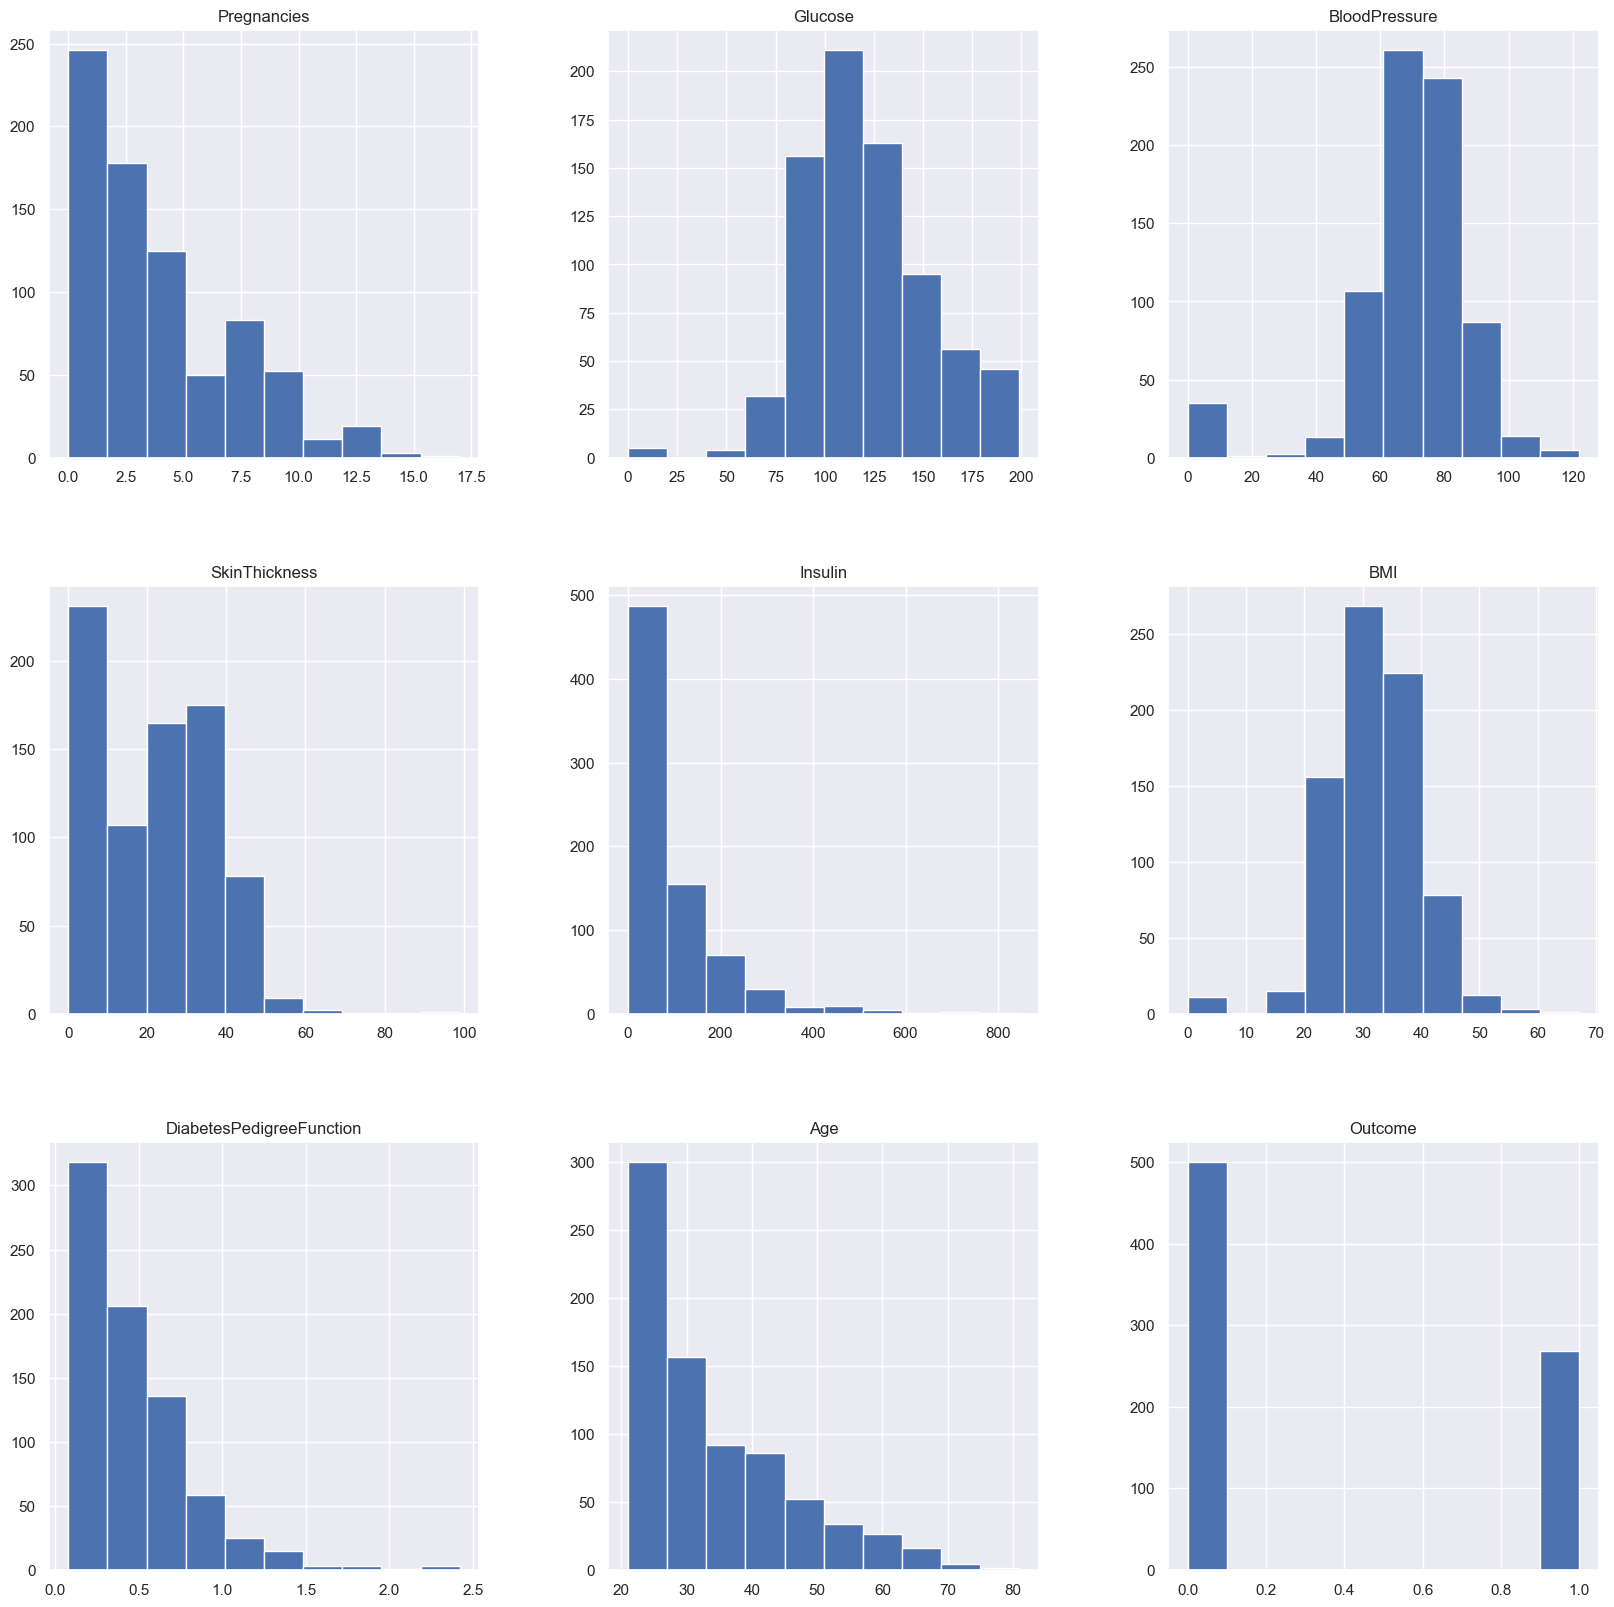

In [10]:
df.hist(figsize=(20,20))

## Replacing null values with mean values

In [11]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace=True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

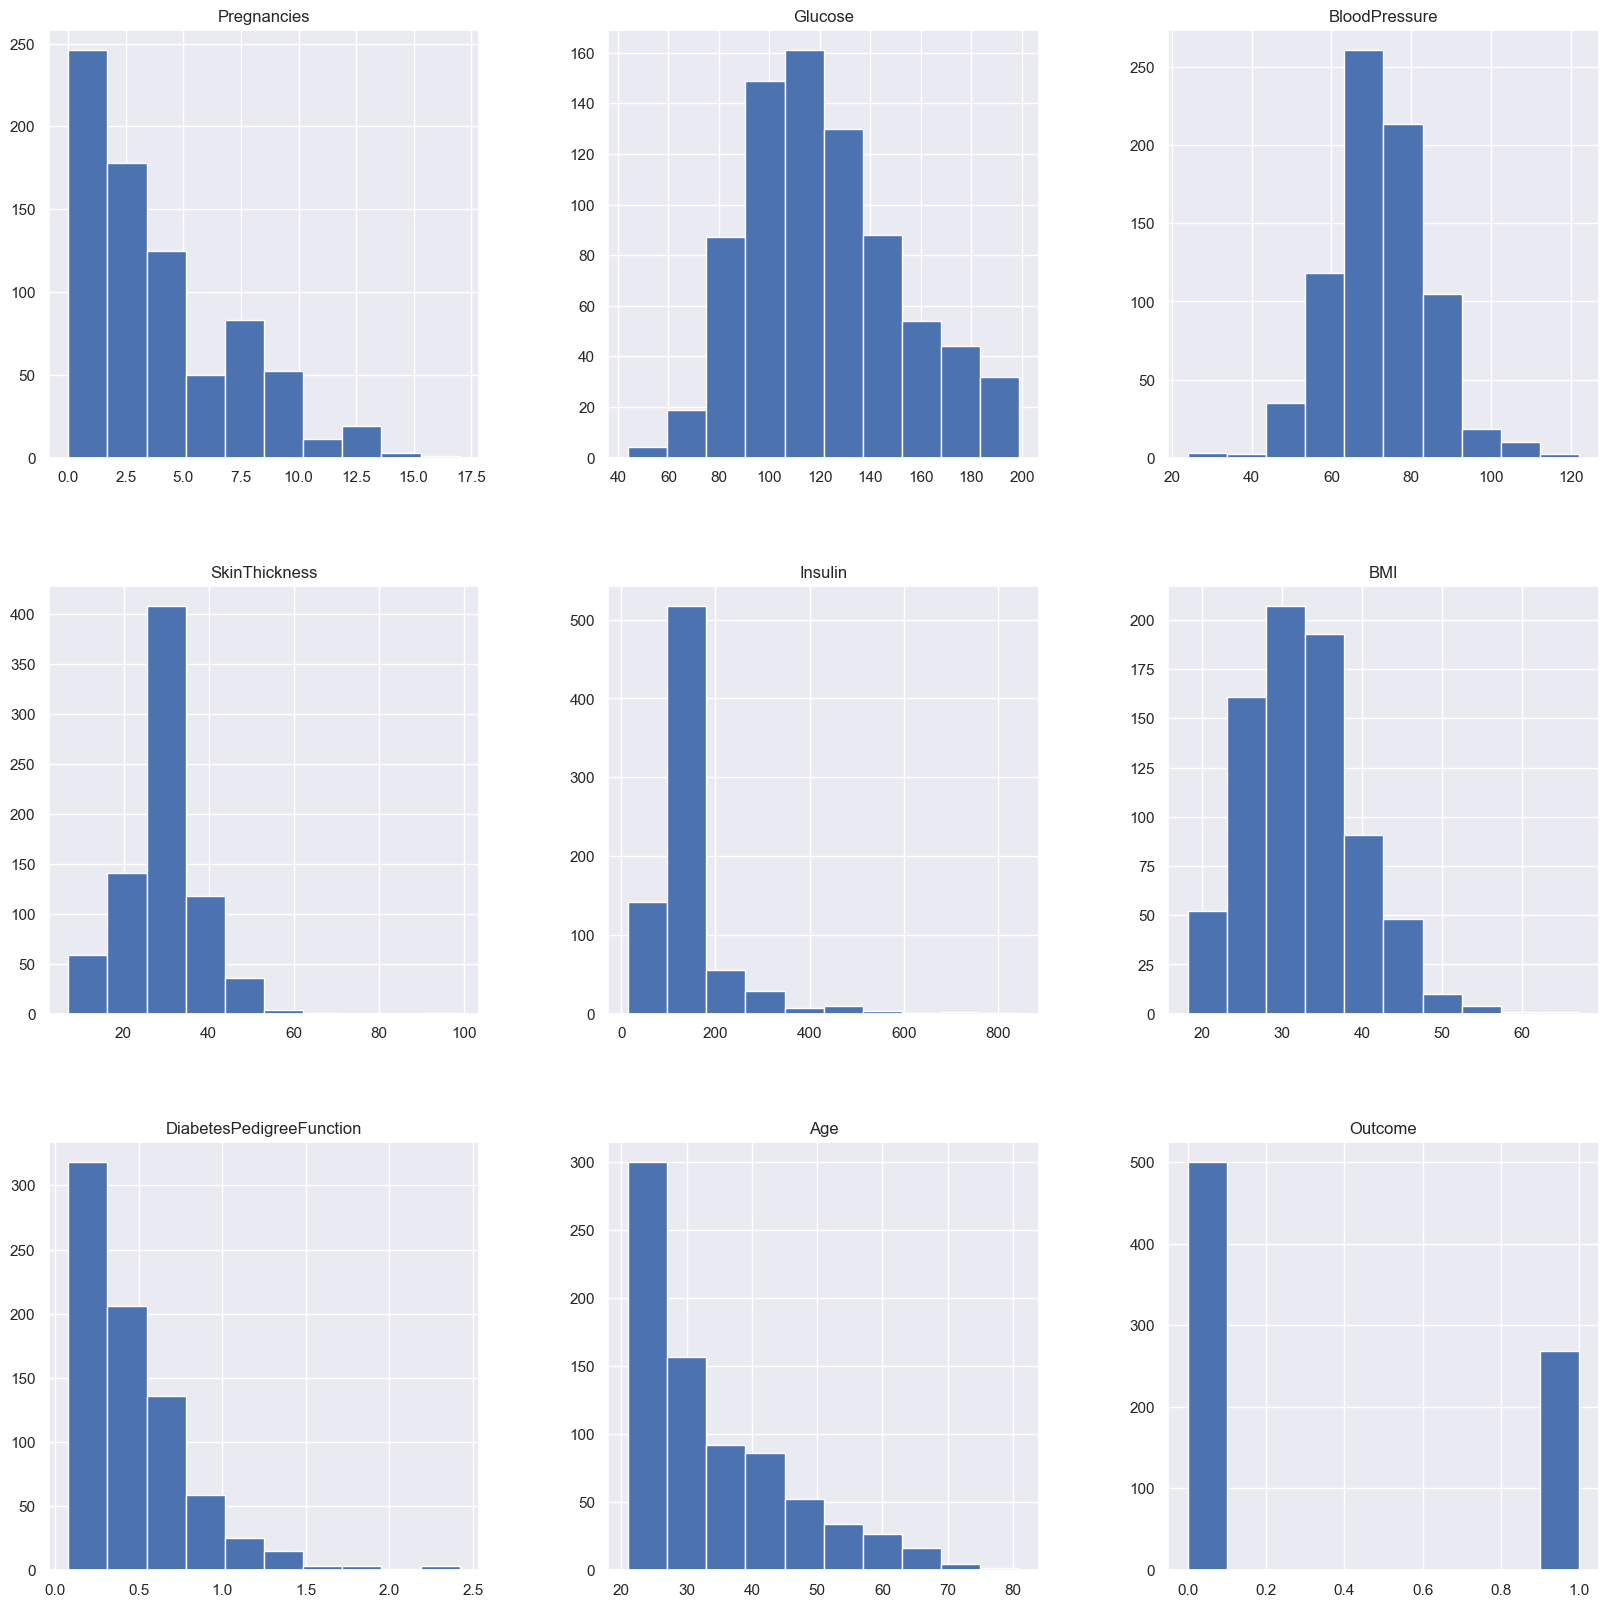

In [12]:
df_copy.hist(figsize=(20,20))

<Axes: >

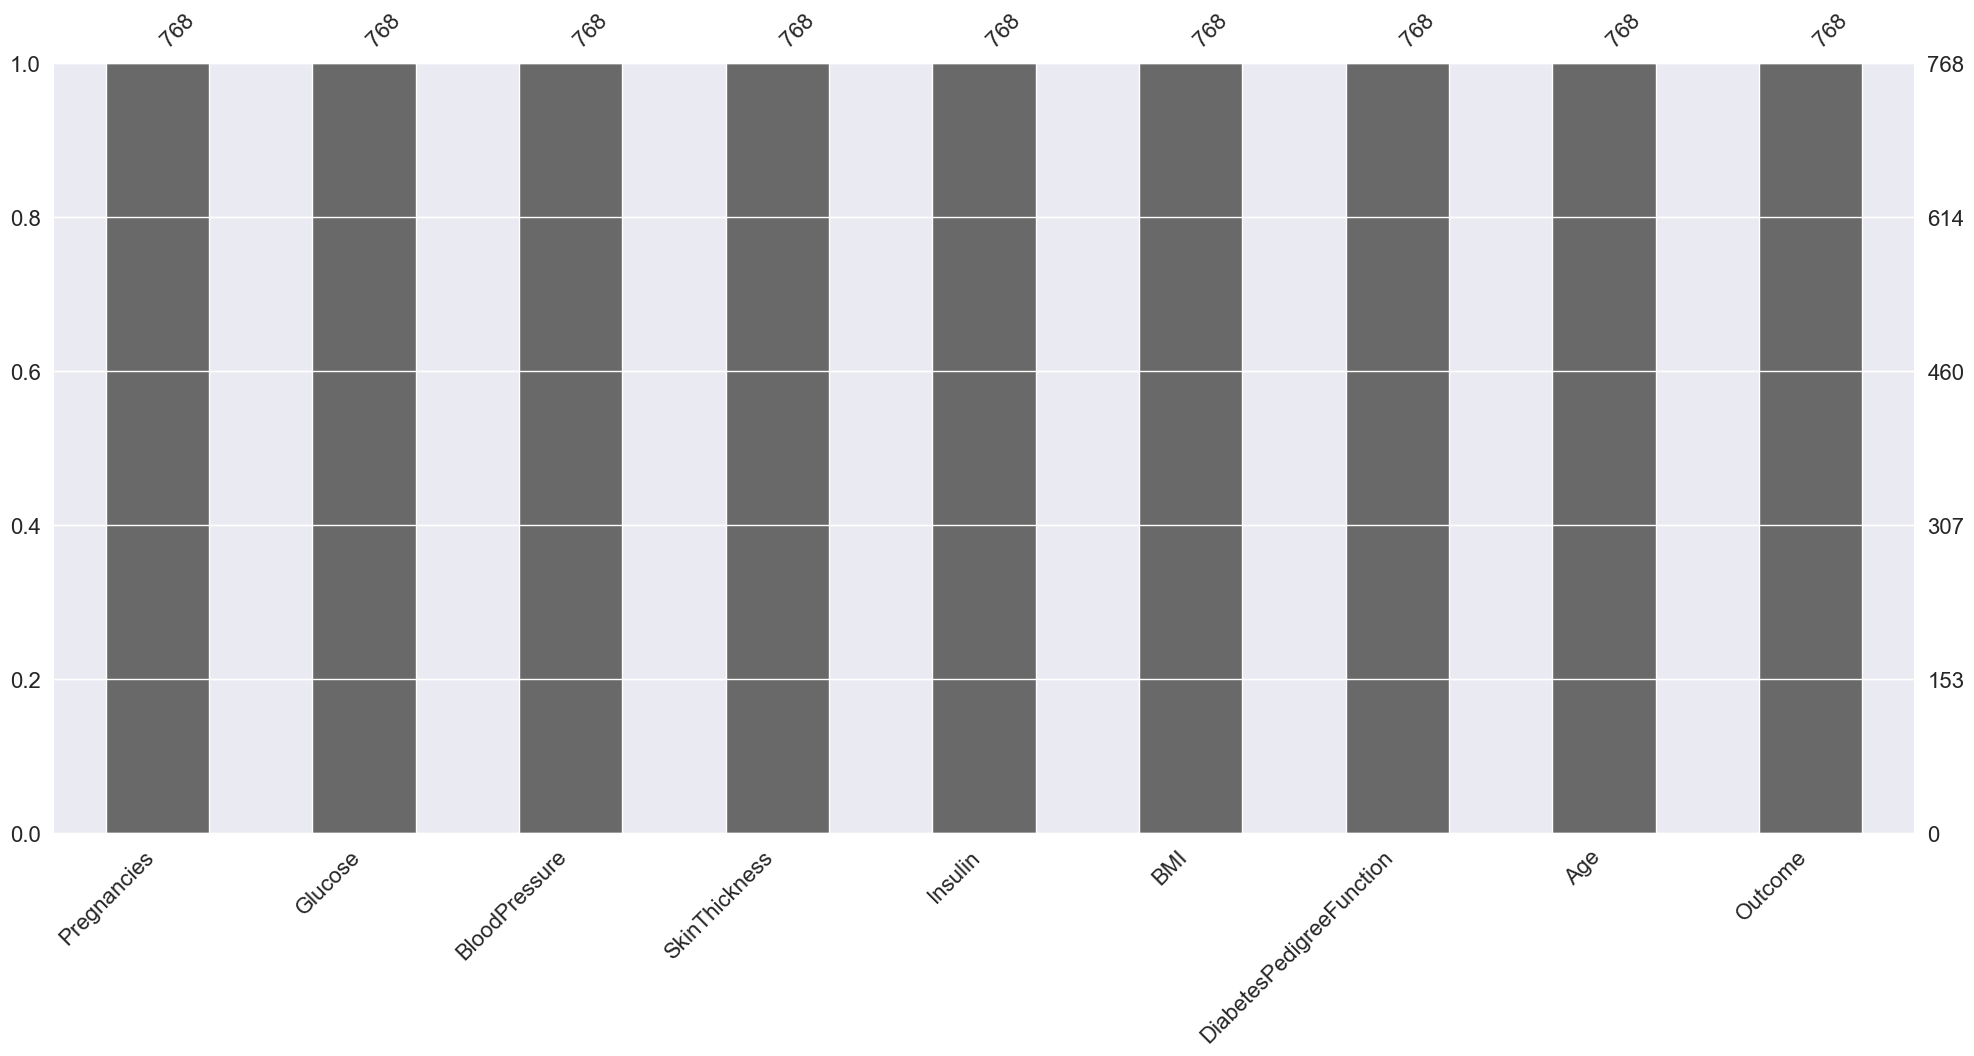

In [13]:
msno.bar(df)

# Checking Out put balencing

Outcome
0    500
1    268
Name: count, dtype: int64


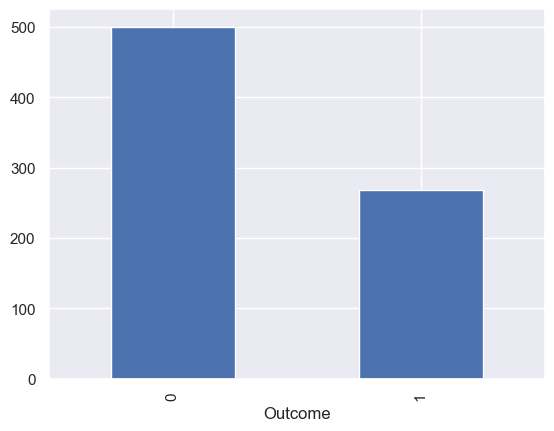

In [14]:
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind='bar')

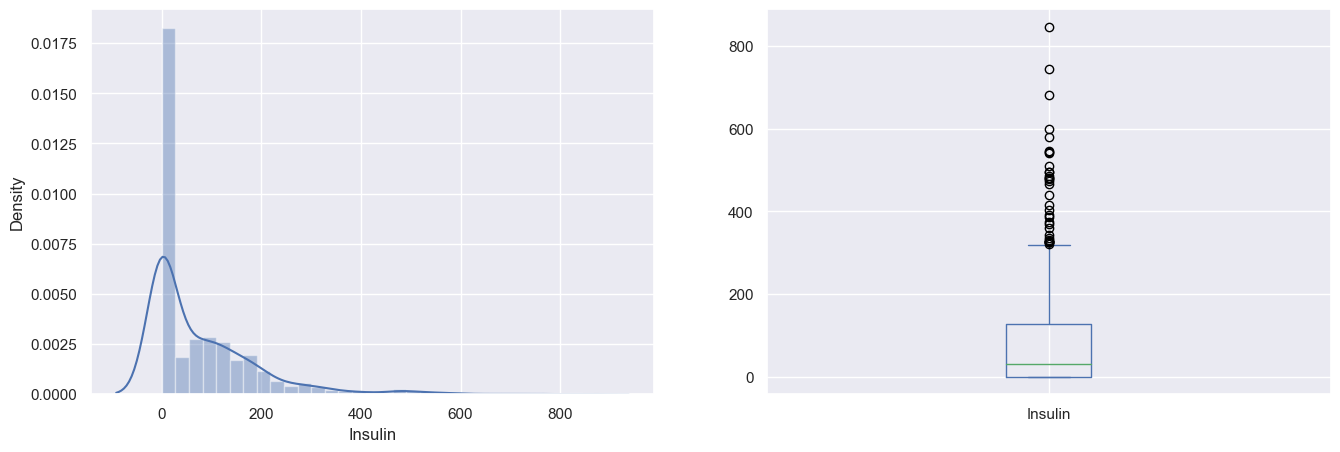

In [16]:
pt.subplot(121),sns.distplot(df['Insulin'])
pt.subplot(122),df["Insulin"].plot.box(figsize=(16,5))
pt.show()

## Finding correlation between all the features

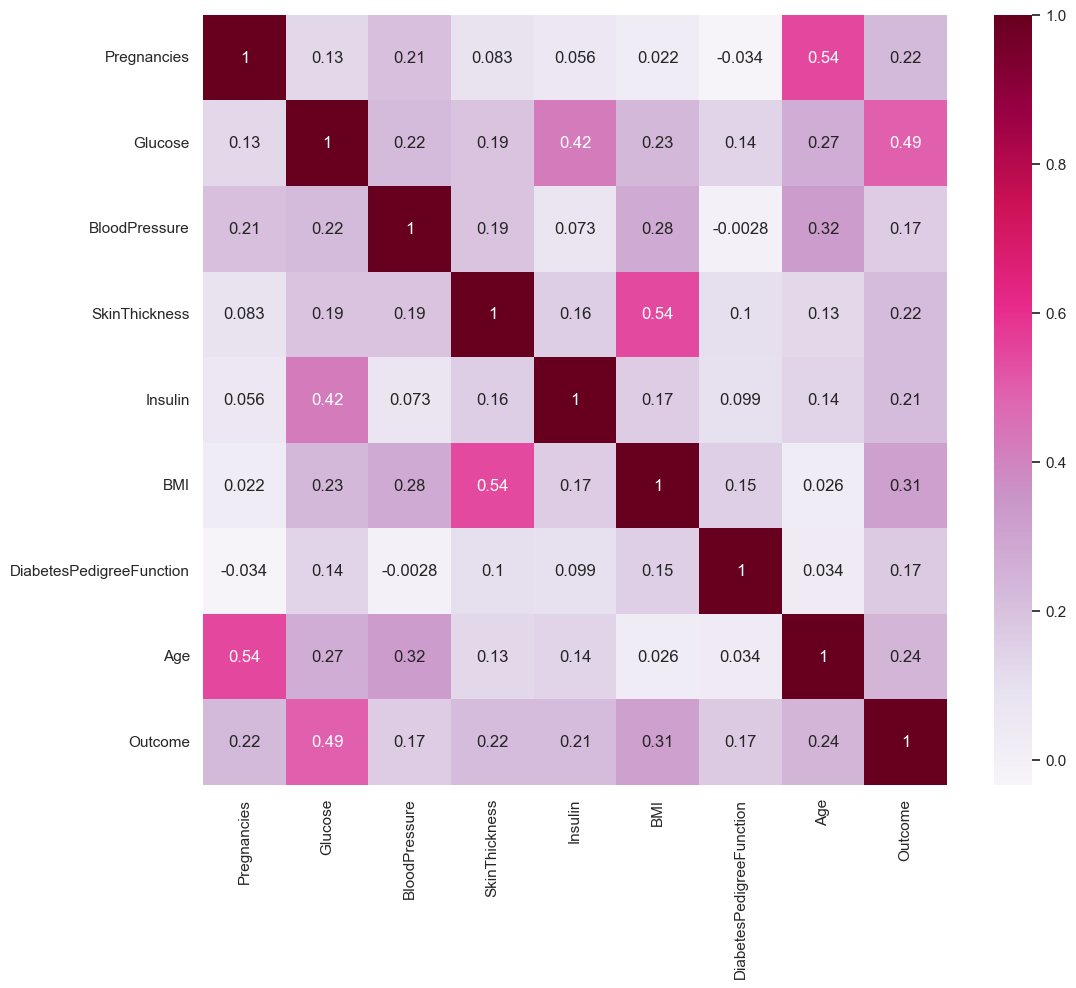

In [72]:
pt.figure(figsize=(12,10))
p = sns.heatmap(df_copy.corr(),annot=True,cmap='PuRd')

# Scaling down Data

In [18]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_copy.drop(['Outcome'],axis = 1)),columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


# Splitting of Dataset

In [20]:
x = df_copy.drop('Outcome',axis=1)
y = df_copy['Outcome']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
outcome_measures = pd.DataFrame(columns=['Accuracy Score','F1 Score','Precision'])

# Building models

## Random Forest model

In [24]:
rfm = RandomForestClassifier(n_estimators=200)
rfm.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
rfm_test = rfm.predict(x_test)

<Axes: >

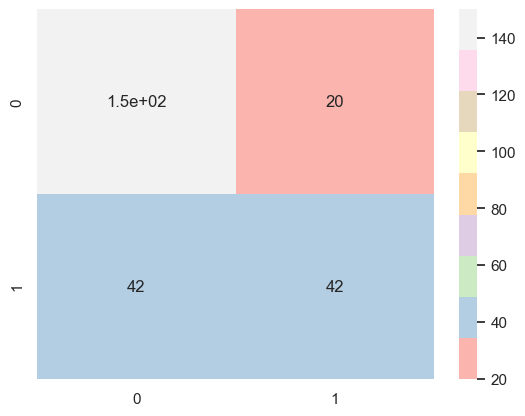

In [74]:
sns.heatmap(confusion_matrix(y_test, rfm_test), annot =True,cmap="Pastel1")

In [27]:
print("Accuracy score: ",format(metrics.accuracy_score(y_test,rfm_test)))

Accuracy score:  0.7559055118110236


In [28]:
print(classification_report(y_test,rfm_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       170
           1       0.68      0.50      0.58        84

    accuracy                           0.76       254
   macro avg       0.73      0.69      0.70       254
weighted avg       0.75      0.76      0.74       254



In [29]:
outcome_measures.loc['Random Forest']=[metrics.accuracy_score(y_test,rfm_test),metrics.f1_score(y_test,rfm_test),metrics.precision_score(y_test,rfm_test)]

## Decision tree model

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier()

In [32]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dtc_test = dtc.predict(x_test)

<Axes: >

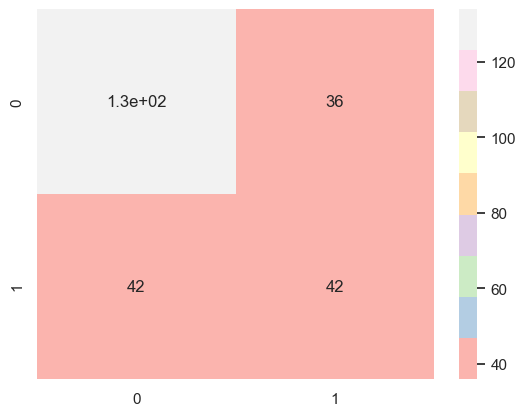

In [76]:
sns.heatmap(confusion_matrix(y_test, dtc_test), annot =True,cmap="Pastel1")

In [35]:
print("Accuracy score: ",format(metrics.accuracy_score(y_test,dtc_test)))

Accuracy score:  0.6929133858267716


In [36]:
print(classification_report(y_test,dtc_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       170
           1       0.54      0.50      0.52        84

    accuracy                           0.69       254
   macro avg       0.65      0.64      0.65       254
weighted avg       0.69      0.69      0.69       254



In [37]:
outcome_measures.loc['Decision Tree']=[metrics.accuracy_score(y_test,dtc_test),metrics.f1_score(y_test,dtc_test),metrics.precision_score(y_test,dtc_test)]

## KNN

In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [39]:
knn = KNeighborsClassifier(n_neighbors = 15,p=2,metric='euclidean')

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [41]:
knn_test = knn.predict(x_test)

<Axes: >

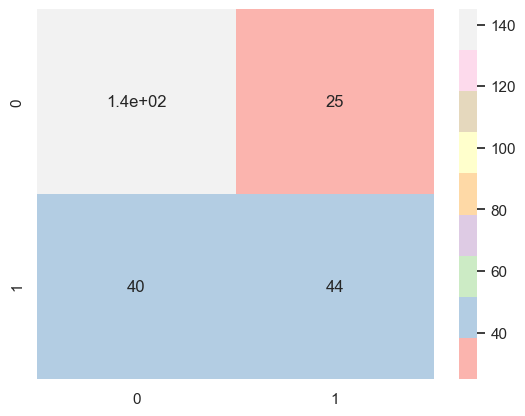

In [77]:
sns.heatmap(confusion_matrix(y_test,knn_test), annot =True,cmap="Pastel1")

In [43]:
print("Accuracy score: ",format(metrics.accuracy_score(y_test,knn_test)))

Accuracy score:  0.7440944881889764


In [44]:
print(classification_report(y_test,knn_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       170
           1       0.64      0.52      0.58        84

    accuracy                           0.74       254
   macro avg       0.71      0.69      0.70       254
weighted avg       0.74      0.74      0.74       254



In [45]:
outcome_measures.loc['KNeighbors']=[metrics.accuracy_score(y_test,knn_test),metrics.f1_score(y_test,knn_test),metrics.precision_score(y_test,knn_test)]

## SVM

In [46]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [47]:
svc_test = svc_model.predict(x_test)

<Axes: >

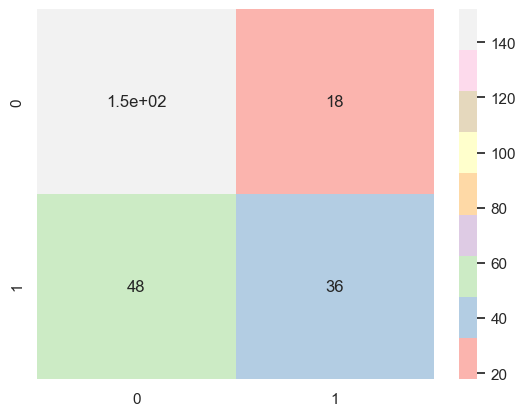

In [79]:
sns.heatmap(confusion_matrix(y_test, svc_test), annot =True,cmap="Pastel1")


In [48]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_test)))

Accuracy Score = 0.7401574803149606


In [50]:
print(classification_report(y_test,svc_test))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       170
           1       0.67      0.43      0.52        84

    accuracy                           0.74       254
   macro avg       0.71      0.66      0.67       254
weighted avg       0.73      0.74      0.72       254



In [51]:
outcome_measures.loc['SVM']=[metrics.accuracy_score(y_test,svc_test),metrics.f1_score(y_test,svc_test),metrics.precision_score(y_test,svc_test)]

## XG boost

In [52]:
xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [53]:
xgb_test = xgb_model.predict(x_test)

Accuracy Score = 0.7913385826771654


<Axes: >

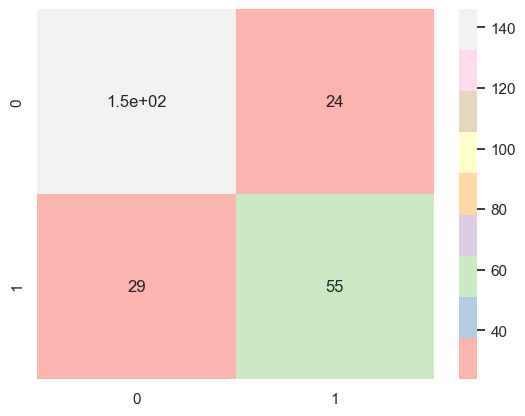

In [80]:
sns.heatmap(confusion_matrix(y_test, xgb_test), annot =True,cmap="Pastel1")

In [83]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_test)))

Accuracy Score = 0.7913385826771654


In [84]:
print(classification_report(y_test,xgb_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       170
           1       0.70      0.65      0.67        84

    accuracy                           0.79       254
   macro avg       0.77      0.76      0.76       254
weighted avg       0.79      0.79      0.79       254



In [55]:
outcome_measures.loc['XGBoost']=[metrics.accuracy_score(y_test,xgb_test),metrics.f1_score(y_test,xgb_test),metrics.precision_score(y_test,xgb_test)]

## Naive Bayes

In [57]:
nb = GaussianNB()

In [58]:
nb.fit(x_train,y_train)

GaussianNB()

In [59]:
nb_test = nb.predict(x_test)

<Axes: >

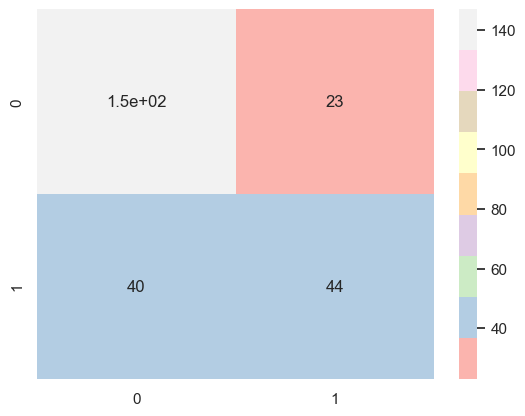

In [81]:
sns.heatmap(confusion_matrix(y_test, nb_test), annot =True,cmap="Pastel1")


In [60]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, nb_test)))

Accuracy Score = 0.7519685039370079


In [85]:
print(classification_report(y_test,nb_test))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       170
           1       0.66      0.52      0.58        84

    accuracy                           0.75       254
   macro avg       0.72      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254



In [62]:
outcome_measures.loc['Naive Bayes']=[metrics.accuracy_score(y_test,nb_test),metrics.f1_score(y_test,nb_test),metrics.precision_score(y_test,nb_test)]

# Selecting the best model

In [63]:
outcome_measures

,Accuracy Score,F1 Score,Precision
Random Forest,0.755906,0.575342,0.677419
Decision Tree,0.692913,0.518519,0.538462
KNeighbors,0.744094,0.575163,0.637681
SVM,0.740157,0.521739,0.666667
XGBoost,0.791339,0.674847,0.696203
Naive Bayes,0.751969,0.582781,0.656716


### It can be observed from the above table that XGBoost model gives high rate of acuuracy in prediction of diabetes

# Saving the model

In [64]:
import pickle
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(xgb_model)

In [65]:
xgb_from_pickle = pickle.loads(saved_model)